## Uploading dataset

In [1]:
!pip install kagglehub

In [2]:
import kagglehub

path = kagglehub.dataset_download("thoughtvector/customer-support-on-twitter")

print("Path to dataset files:", path)

100%|██████████| 169M/169M [00:06<00:00, 27.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/thoughtvector/customer-support-on-twitter/versions/10


In [3]:
import pandas as pd

df = pd.read_csv(path + "/twcs/twcs.csv")
df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


## Data Exploration

In [4]:
df.shape

(2811774, 7)

We have a lot of rows and 7 columns

In [5]:
df.columns

Index(['tweet_id', 'author_id', 'inbound', 'created_at', 'text',
       'response_tweet_id', 'in_response_to_tweet_id'],
      dtype='object')

It looks like all columns' data type is object

In [6]:
df['text_len'] = df['text'].astype(str).str.len()
df['text_len'].describe()

,text_len
count,2.811774e+06
mean,1.138897e+02
std,5.234562e+01
min,1.000000e+00
25%,7.800000e+01
50%,1.150000e+02
75%,1.390000e+02
max,5.130000e+02


Most tweets in the dataset are short, with average length of around 114 characters. There are a few very short tweets and some longer ones up to 500 characters, but overall text length is quite consistent.

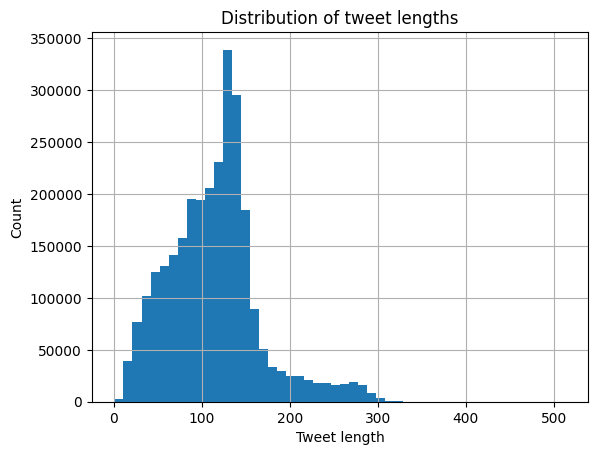

In [7]:
import matplotlib.pyplot as plt

df['text_len'].hist(bins=50)
plt.xlabel('Tweet length')
plt.ylabel('Count')
plt.title('Distribution of tweet lengths')
plt.show()

As we can see here the most tweets are between about 80 and 150 characters, with clear peak around 120. Only a small number of tweets are very short or very long, so overall length distribution is quite concentrated

## Defining Issue Categories

We have selected six issue categories that reflect the most common types of customer problems:

*   Billing
*   Delivery
*   Technical Issues
*   Account Issues
*   Refund/Cancellation
*   General

These categories are simple, clear and business-relevant, which makes them suitable for manual annotation and model training.

## Annotation

### Sampling a subset of tweets

We are selecting a random subset of 400 tweets from the full dataset to create a manageable annotation sample.


In [11]:
customer_df = df[df['inbound'] == True]

Since issue types apply to customer problems, we have filtered the dataset to include only inbound messages for annotation.

In [12]:
sample_df = customer_df.sample(400, random_state=42)[['text']]
sample_df.head()

,text
26861,@AppleSupport Basically for a chat to be opene...
211386,@AppleSupport iOS 11.02 and Watchos4.0: No ico...
78521,"Dear god not again,@AppleSupport https://t.co/..."
1225222,@ATVIAssist Hi there! If I buy Call of Duty WW...
194583,Hi @Safaricom_Care why can't I pay my my Dstv ...


In [13]:
sample_df['label'] = ''
sample_df.head()

,text,label
26861,@AppleSupport Basically for a chat to be opene...,
211386,@AppleSupport iOS 11.02 and Watchos4.0: No ico...,
78521,"Dear god not again,@AppleSupport https://t.co/...",
1225222,@ATVIAssist Hi there! If I buy Call of Duty WW...,
194583,Hi @Safaricom_Care why can't I pay my my Dstv ...,


We created an empty label columns to prepare dataset for manual annotation

In [14]:
#sample_df.to_csv('annotation_sample.csv', index=False)

#from google.colab import files
#files.download('annotation_sample.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We have manually labeled all 400 tweets and loaded the annotated dataset directly from GutHub

In [16]:
url = 'https://raw.githubusercontent.com/giorgi00798/NLP-Group-Assignment-Customer-Support-on-Twitter/refs/heads/main/annotated_400_tweets.csv'

annotated_df = pd.read_csv(url)
annotated_df.head()

,text,label
0,@AppleSupport Basically for a chat to be opene...,Technical Issues
1,@AppleSupport iOS 11.02 and Watchos4.0: No ico...,Technical Issues
2,"Dear god not again,@AppleSupport https://t.co/...",General
3,@ATVIAssist Hi there! If I buy Call of Duty WW...,Technical Issues
4,Hi @Safaricom_Care why can't I pay my my Dstv ...,Billing
